# Waveforms

## Q1 

In [4]:
## import libraries

import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf
import math

$$f(n)=A(2 \pi f \frac{n}{f_s}+\phi)$$

$$f(n)=1*(2 \pi* 440 \frac{n}{44100}+0)$$

In [ ]:
## set parameter(fs is the sampling rate, f is the frequency, phi is phase, A is amplitude)
amplitude=1.0
fs=44100
frequency=440
phase=0
duration=0.02
# duration=1

## Time axis
t=np.arange(0, duration, 1/fs)

##generate sine wave
fn=amplitude*np.sin(2*np.pi*frequency*t+phase)

In [6]:
sf.write("./ppt_material_mp3/Q1sine440Hz.mp3", fn, fs)

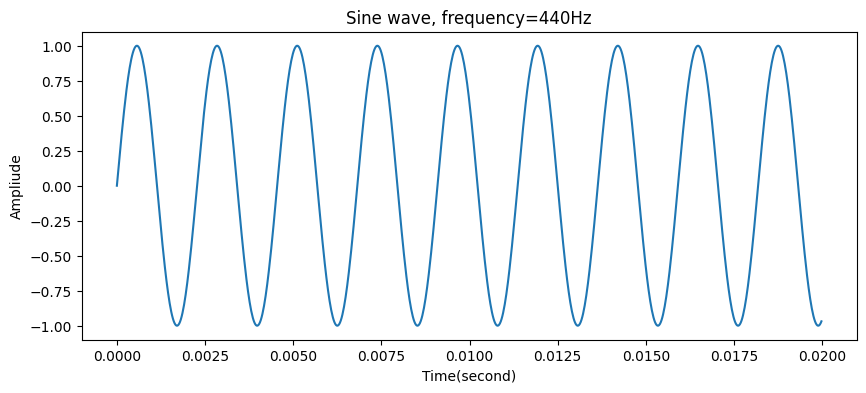

In [3]:
plt.figure(figsize=(10,4))
plt.plot(t,fn)
plt.xlabel("Time(second)")
plt.ylabel("Ampliude")
plt.title("Sine wave, frequency=440Hz")
plt.show()

## Q2

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [4]:
## set parameter(fs is the sampling rate, f is the frequency, phi is phase, A is amplitude,K is the number of the harmonics)
amplitude=1.0
fs=44100
frequency=440
phase=0
duration=0.02
# duration=1
K=1000

t=np.arange(0,duration,1/fs)

# the sine wave equation is 
fn=amplitude*np.sin(2*np.pi*frequency*t+phase)



In [10]:
# the square wave is as follows:
fn=np.zeros_like(t)
for k in range(1,K+1,2):
    fn+=amplitude/k*np.sin(2*np.pi*k*frequency*t+phase)
fn=fn/np.max(fn)*amplitude

In [11]:
sf.write("./ppt_material_mp3/Q2Squarewave.mp3", fn, fs)

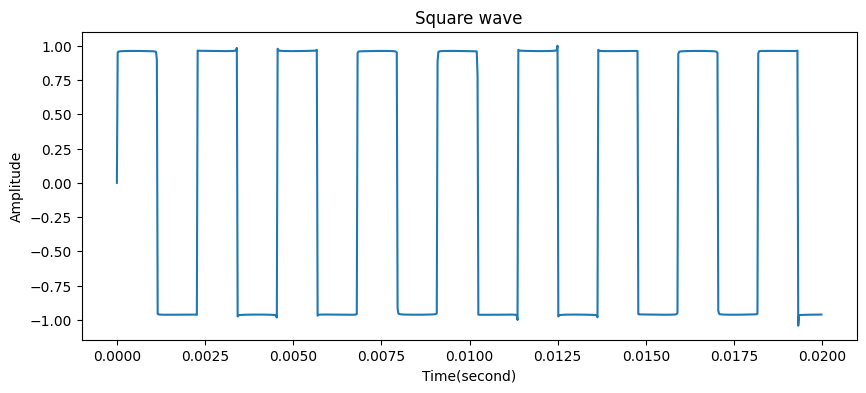

In [7]:
plt.figure(figsize=(10,4))
plt.plot(t,fn)
plt.xlabel("Time(second)")
plt.ylabel("Amplitude")
plt.title("Square wave")
plt.show()

In [12]:
# the square wave is as follows:
fn=np.zeros_like(t)
for k in range(2,K+2,2):
    fn+=amplitude/k*np.sin(2*np.pi*k*frequency*t+phase)
fn=fn/np.max(fn)*amplitude

In [13]:
sf.write("./ppt_material_mp3/Q2Sawtoothwave.mp3", fn, fs)

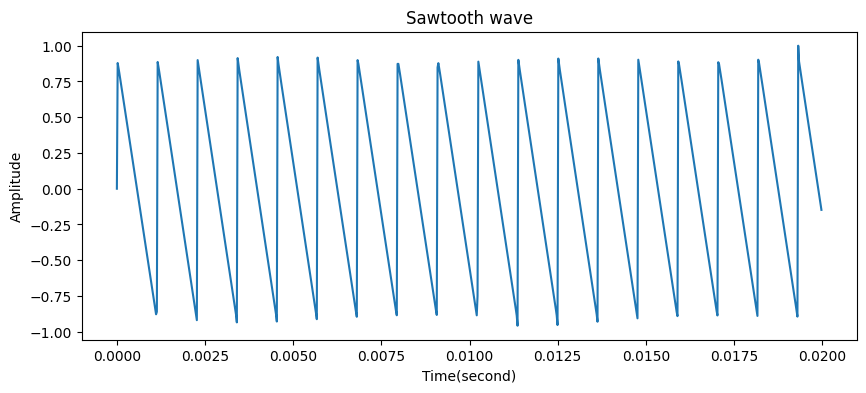

In [9]:
plt.figure(figsize=(10,4))
plt.plot(t,fn)
plt.xlabel("Time(second)")
plt.ylabel("Amplitude")
plt.title("Sawtooth wave")
plt.show()

In [14]:
# the square wave is as follows:
fn=np.zeros_like(t)
for k in range(1,K+1,2):
    fn+=(-1)**((k-1)/2)*amplitude/(k**2)*np.sin(2*np.pi*k*frequency*t+phase)
fn=fn/np.max(fn)*amplitude

In [15]:
sf.write("./ppt_material_mp3/Q2Trianglewave.mp3", fn, fs)

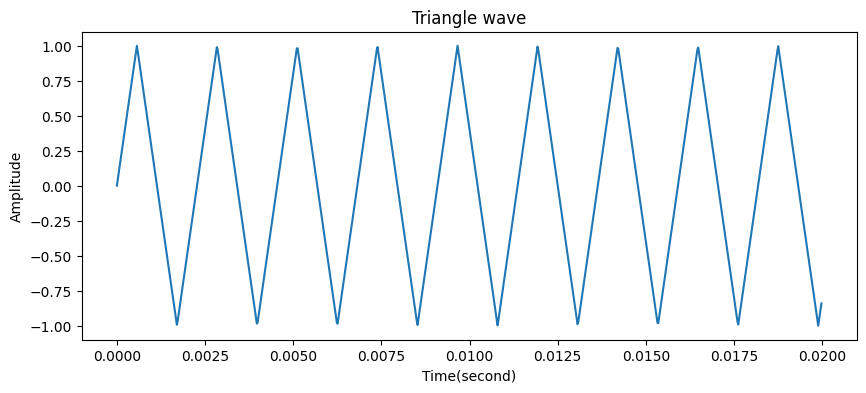

In [11]:
plt.figure(figsize=(10,4))
plt.plot(t,fn)
plt.xlabel("Time(second)")
plt.ylabel("Amplitude")
plt.title("Triangle wave")
plt.show()

## Q3

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

audio link：https://sound-effects.bbcrewind.co.uk/search?q=NHU05104233

In [13]:
data, samplerate=sf.read("peregrine.wav")

## transform stereo to mono
if data.ndim==2:
    data.mean(axis=1)

## get first 20s
N=int(20*samplerate)
data=data[:N]



Text(0.5, 1.0, 'peregrine sound wav')

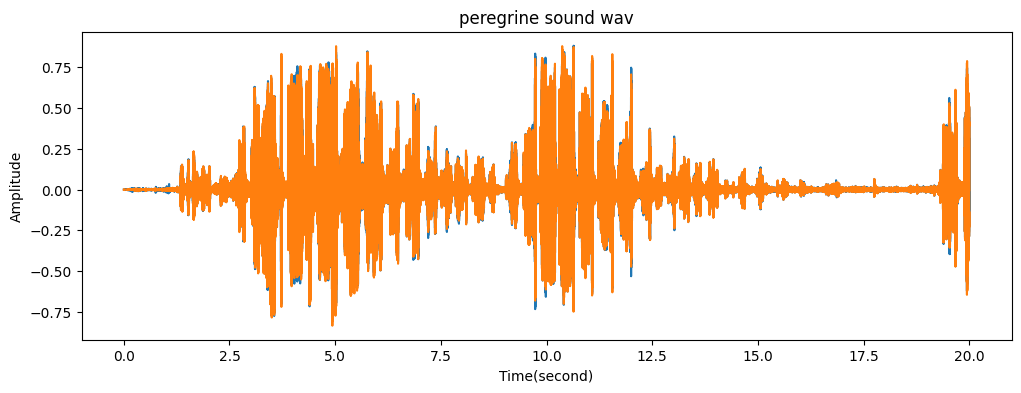

In [14]:
t=np.arange(len(data))/samplerate
plt.figure(figsize=(12,4))
plt.plot(t, data)
plt.xlabel("Time(second)")
plt.ylabel("Amplitude")
plt.title("peregrine sound wav")

## Q4

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

audio recorded by myself.

Content: I want to buy a shoes for my football game.

In [16]:
data, samplerate=sf.read("myspeech.wav")

## transform stereo to mono
if data.ndim==2:
    data.mean(axis=1)



Text(0.5, 1.0, 'myspeech sound wav')

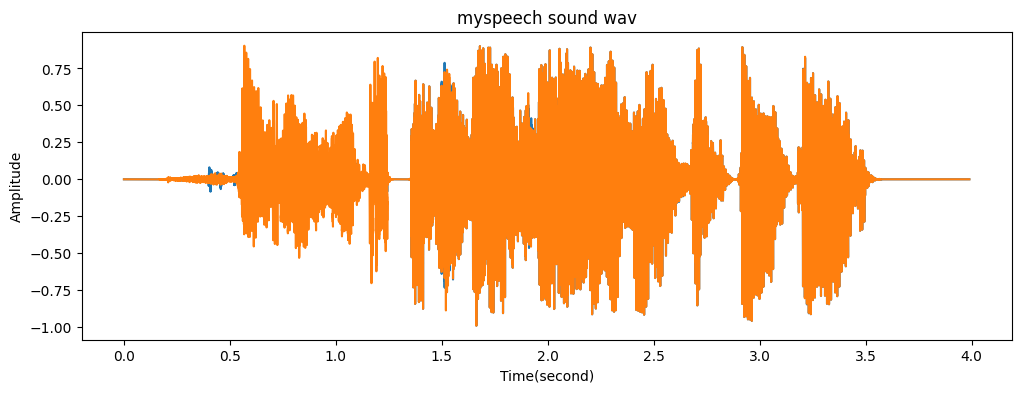

In [17]:
t=np.arange(len(data))/samplerate
plt.figure(figsize=(12,4))
plt.plot(t, data)
plt.xlabel("Time(second)")
plt.ylabel("Amplitude")
plt.title("myspeech sound wav")

# Fourier transform

## Q5

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

$$f(n)=1*(2 \pi* 440 \frac{n}{44100}+0)+4*(2 \pi* 1000 \frac{n}{44100}+0)$$

In [20]:
## generate a signal composed of more than one sinusoid of different frequencies and amplitudes

fs=44100
duration=0.1

amplitude1=1.0
frequency1=440
phase1=0

amplitude2=4.0
frequency2=1000
phase2=0

t = np.arange(0, duration, 1/fs)

fn=amplitude1*np.sin(2*np.pi*frequency1*t+phase1) + amplitude2*np.sin(2*np.pi*frequency2*t+phase2)


In [18]:
sf.write("./ppt_material_mp3/Q5MultiSinewave.mp3", fn, fs)

In [21]:
def fft_mag(fn, fs, N, window_type):
    # take first N samples
    fn_N = fn[:N]

    # select window type
    if window_type == "rectangular":
        w = np.ones(N)            
        wname = "Rectangular"
    elif window_type == "hann":
        w = np.hanning(N)         
        wname = "Hanning"

    # apply window
    fn_w = fn_N * w

    # FFT 
    F_fn = np.fft.fft(fn_w, n=N)
    magnitude = np.abs(F_fn)

    # frequency axis (Hz)
    freqs = np.fft.fftfreq(N, d=1/fs)

    # plot
    plt.figure(figsize=(6, 4))
    plt.plot(freqs, magnitude)
    plt.xlabel("Frequency(Hz)")
    plt.ylabel("Magnitude")
    plt.title(f"FFT Magnitude (N={N}, Window={wname})")
    plt.show()


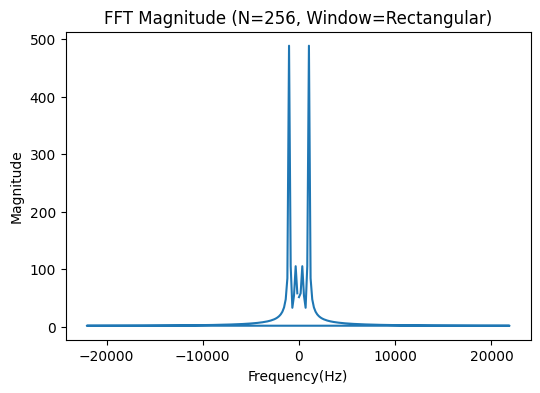

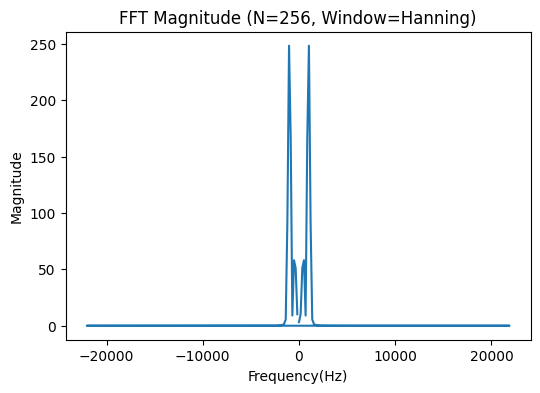

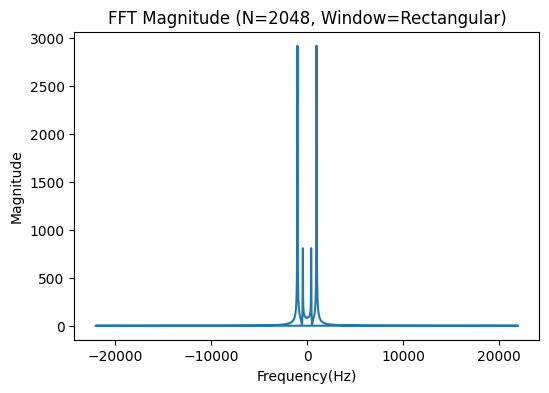

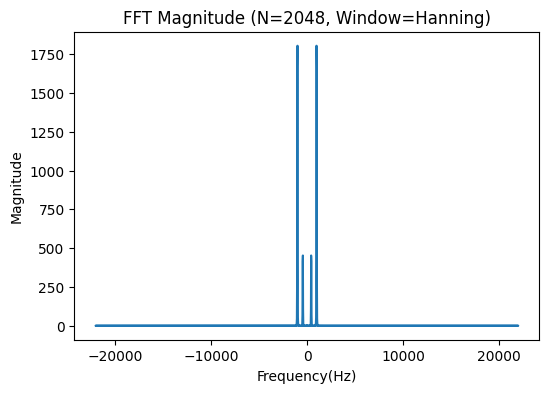

In [22]:
# N = 256
fft_mag(fn, fs, N=256, window_type="rectangular")
fft_mag(fn, fs, N=256, window_type="hann")

# N = 2048
fft_mag(fn, fs, N=2048, window_type="rectangular")
fft_mag(fn, fs, N=2048, window_type="hann")

## Q6

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

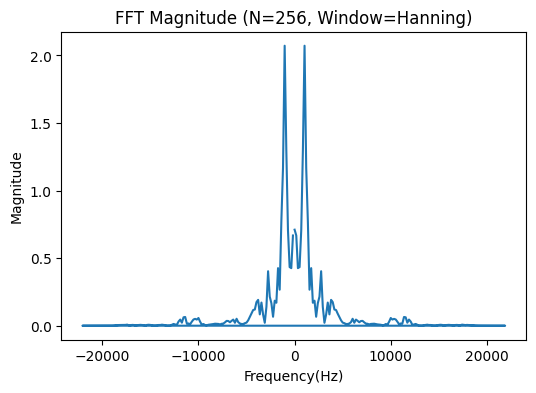

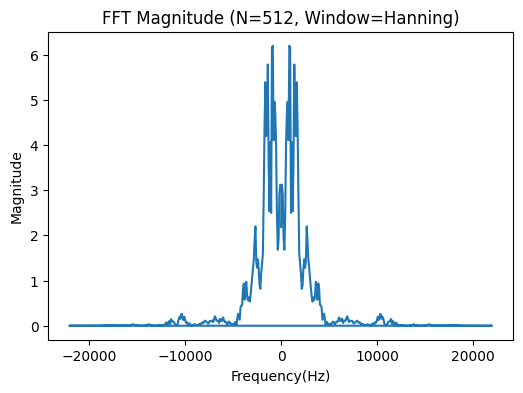

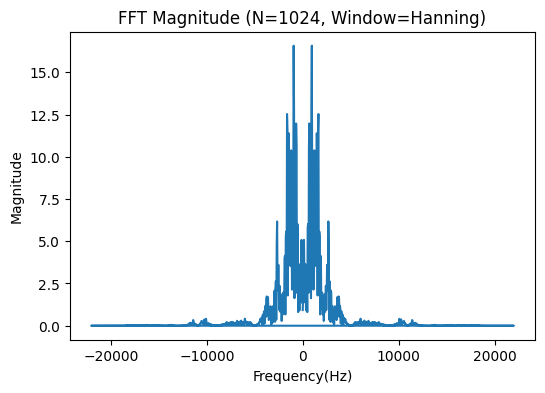

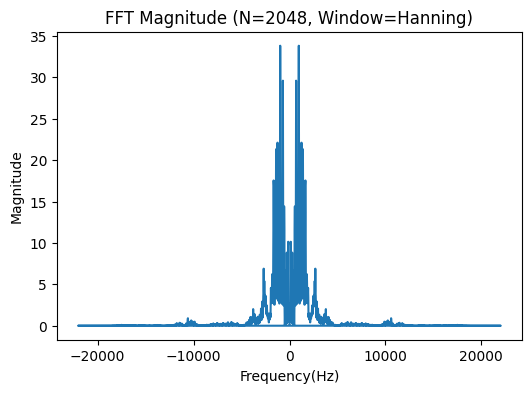

In [24]:
data, samplerate=sf.read("vowel_speech.wav")


fft_mag(data, fs, N=256, window_type="hann")
fft_mag(data, fs, N=512, window_type="hann")
fft_mag(data, fs, N=1024, window_type="hann")
fft_mag(data, fs, N=2048, window_type="hann")

# Spectrogram

## Q7

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import soundfile as sf

In [25]:
data, samplerate = sf.read("myspeech.wav")

if data.ndim==2:
    data=data.mean(axis=1)

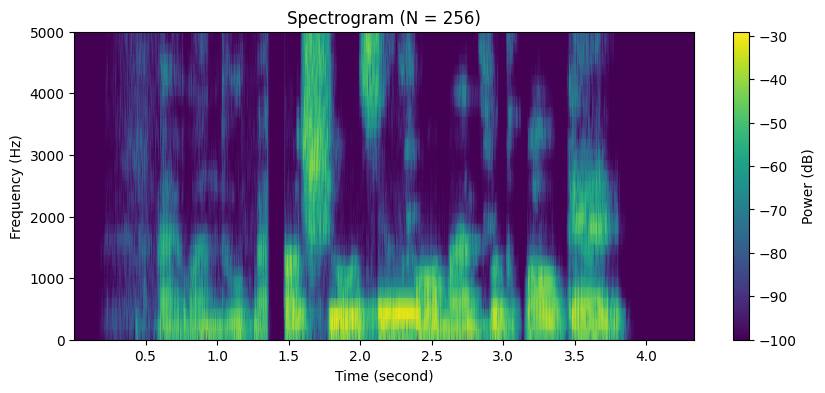

In [26]:
frequency1, time1, Sx1 = spectrogram(data, fs, window='hann', nperseg=256)

plt.figure(figsize=(10,4))
plt.pcolormesh(time1, frequency1, 10*np.log10(Sx1 + 1e-10), shading='gouraud')
plt.xlabel("Time (second)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (N = 256)")
plt.ylim(0, 5000)
plt.colorbar(label="Power (dB)")
plt.show()


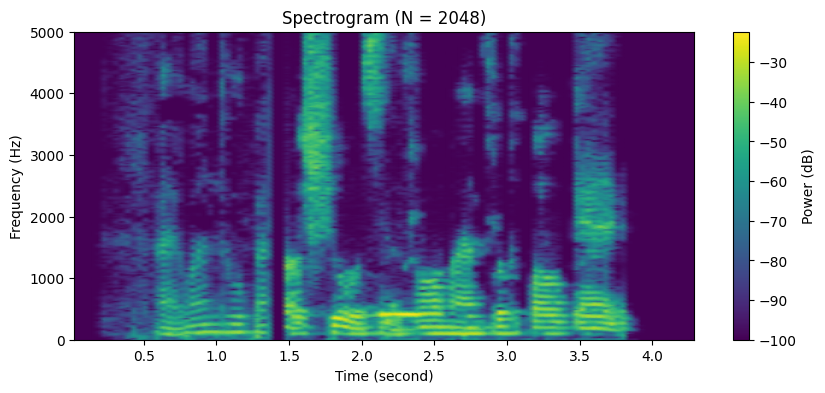

In [27]:
frequency1, time1, Sx1 = spectrogram(data, fs, window='hann', nperseg=2048)

plt.figure(figsize=(10,4))
plt.pcolormesh(time1, frequency1, 10*np.log10(Sx1 + 1e-10), shading='gouraud')
plt.xlabel("Time (second)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (N = 2048)")
plt.ylim(0, 5000)
plt.colorbar(label="Power (dB)")
plt.show()


## Q8

audio link：https://sound-effects.bbcrewind.co.uk/search?q=NHU05104233

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import soundfile as sf

In [6]:
data, samplerate = sf.read("peregrine.wav")

if data.ndim==2:
    data=data.mean(axis=1)

duration=5
N=duration*samplerate
data=data[N:2*N]

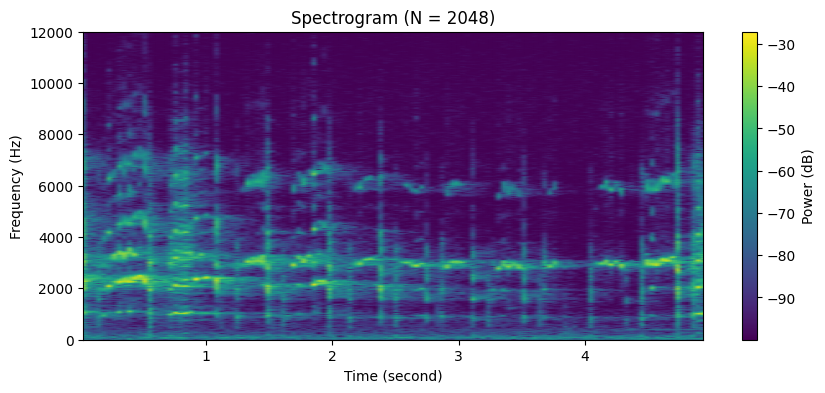

In [7]:
frequency1, time1, Sx1 = spectrogram(data, fs, window='hann', nperseg=2048)

plt.figure(figsize=(10,4))
plt.pcolormesh(time1, frequency1, 10*np.log10(Sx1 + 1e-10), shading='gouraud')
plt.xlabel("Time (second)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (N = 2048)")
plt.ylim(0, 12000)
plt.colorbar(label="Power (dB)")
plt.show()


## Q9

audio link：https://samples.landr.com/collections/free-drum-loops-breaks?genres=electronic

BanginSlowStorm Drum loop_124bpm

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import spectrogram
import soundfile as sf

In [9]:
data, samplerate = sf.read("peregrine.wav")

if data.ndim==2:
    data=data.mean(axis=1)

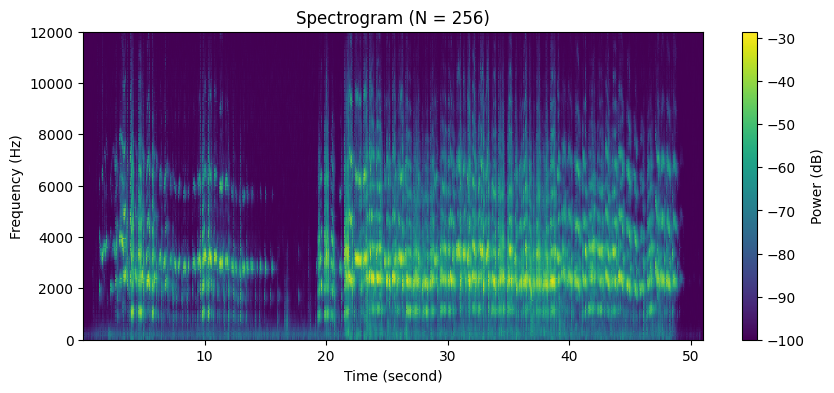

In [12]:
frequency1, time1, Sx1 = spectrogram(data, fs, window='hann', nperseg=256)

plt.figure(figsize=(10,4))
plt.pcolormesh(time1, frequency1, 10*np.log10(Sx1 + 1e-10), shading='gouraud')
plt.xlabel("Time (second)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (N = 256)")
plt.ylim(0, 12000)
plt.colorbar(label="Power (dB)")
plt.show()


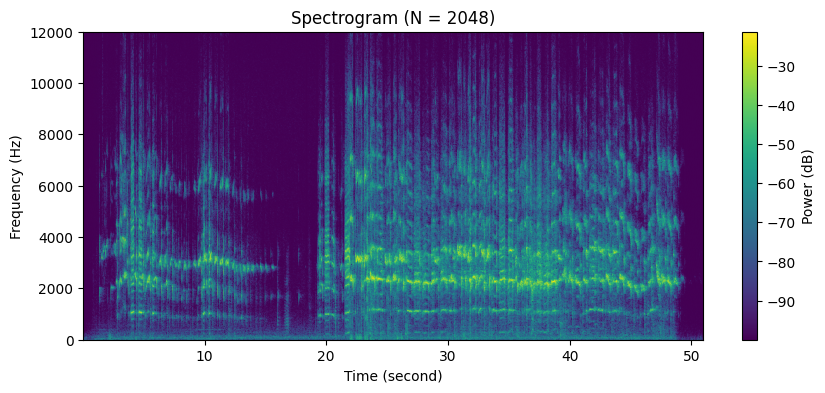

In [ ]:
frequency2, time2, Sx2 = spectrogram(data, fs, window='hann', nperseg=2048)

plt.figure(figsize=(10,4))
plt.pcolormesh(time2, frequency2, 10*np.log10(Sx2 + 1e-10), shading='gouraud')
plt.xlabel("Time (second)")
plt.ylabel("Frequency (Hz)")
plt.title("Spectrogram (N = 2048)")
plt.ylim(0, 12000)
plt.colorbar(label="Power (dB)")
plt.show()


# Sampling and Aliasing

## Q10

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import soundfile as sf

In [23]:
amplitude=1.0
frequency=440
phase=0
duration=1

high_fs=44100
close_fs=890
low_fs=512

$$f(n)=1*(2 \pi* 440 \frac{n}{512}+0)$$

$$f(n)=1*(2 \pi* 440 \frac{n}{890}+0)$$

$$f(n)=1*(2 \pi* 440 \frac{n}{44100}+0)$$

In [26]:
def alias_frequency(f, fs):
    f_alias = abs(f - np.round(f/fs) * fs)
    if f_alias > fs/2:
        f_alias = fs - f_alias
    return f_alias

def ResearchNyquistRate(fs, label, plot_ms=50, Nfft=4096):

    t = np.arange(0, duration, 1/fs)
    fn = amplitude * np.sin(2 * np.pi * frequency * t + phase)

    wav_name = f"q10_{label}_fs{fs}.wav"
    sf.write(wav_name, fn, fs)

    L = int((plot_ms / 1000.0) * fs)
    t_plot = t[:L]
    fn_plot = fn[:L]

    plt.figure(figsize=(10, 3.5))
    plt.plot(t_plot, fn_plot, marker='o')
    plt.xlabel("Time (second)")
    plt.ylabel("Amplitude")
    plt.title(f"Time-domain waveform (fs = {fs} Hz, f = {frequency} Hz)")
    plt.show()

    N = min(len(fn), Nfft)
    fnN = fn[:N]

    window = np.hanning(N)
    fn_windowed = fnN * window

    Ffn = np.fft.rfft(fn_windowed, n=Nfft)
    magnitude = np.abs(Ffn)
    freqs = np.fft.rfftfreq(Nfft, d=1/fs)

    plt.figure(figsize=(10, 3.5))
    plt.plot(freqs, magnitude)
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.title(f"FFT magnitude (fs = {fs} Hz, Nfft = {Nfft})")
    plt.xlim(0, fs/2)

    plt.show()

    aliased_freq = alias_frequency(frequency, fs)
    print(
        f"[{label}] fs = {fs} Hz, Nyquist = {fs/2:.1f} Hz, "
        f"original frequency = {frequency} Hz, "
        f"observed (aliased) ≈ {aliased_freq:.1f} Hz"
    )
    print(f"Saved audio: {wav_name}\n")



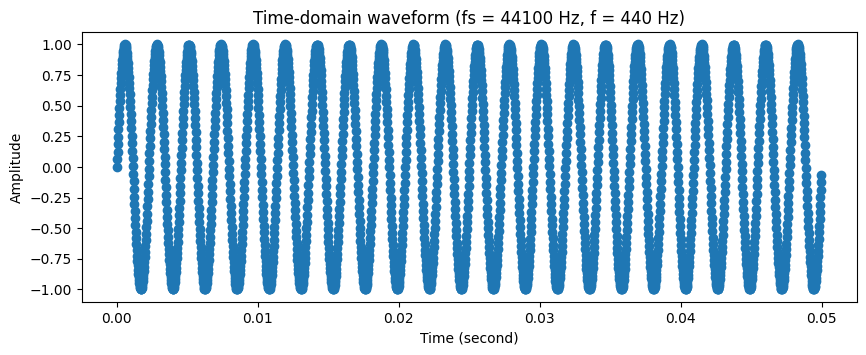

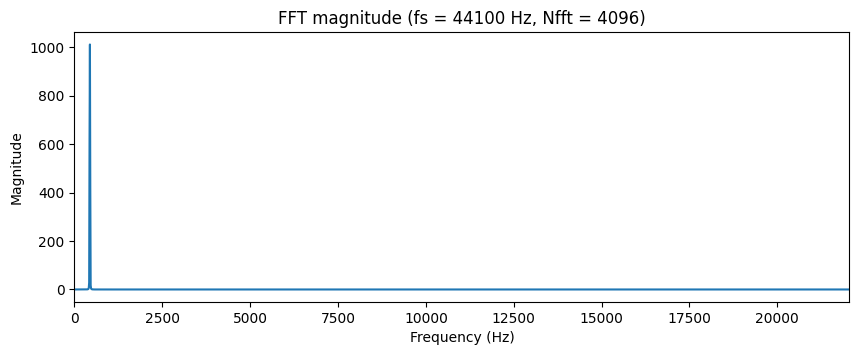

[high] fs = 44100 Hz, Nyquist = 22050.0 Hz, original frequency = 440 Hz, observed (aliased) ≈ 440.0 Hz
Saved audio: q10_high_fs44100.wav



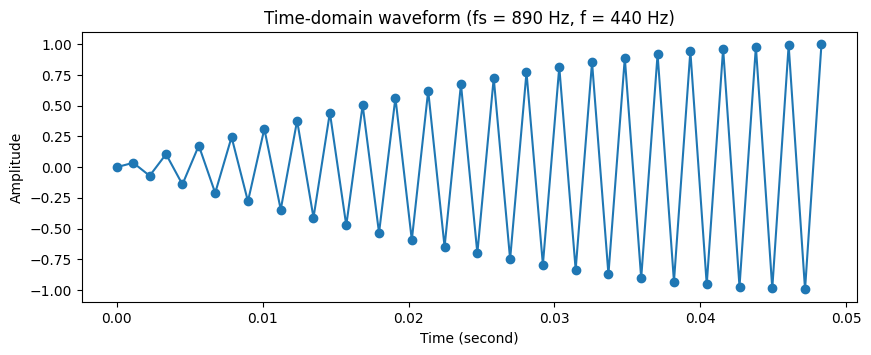

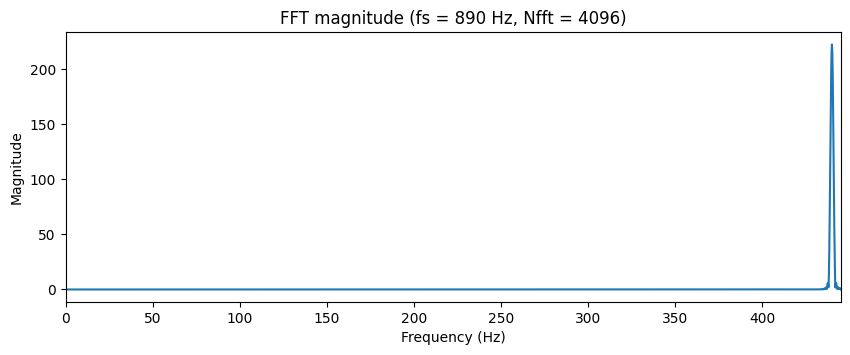

[close] fs = 890 Hz, Nyquist = 445.0 Hz, original frequency = 440 Hz, observed (aliased) ≈ 440.0 Hz
Saved audio: q10_close_fs890.wav



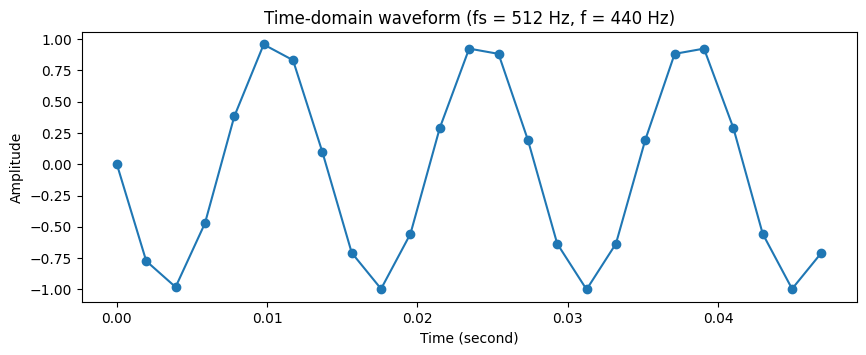

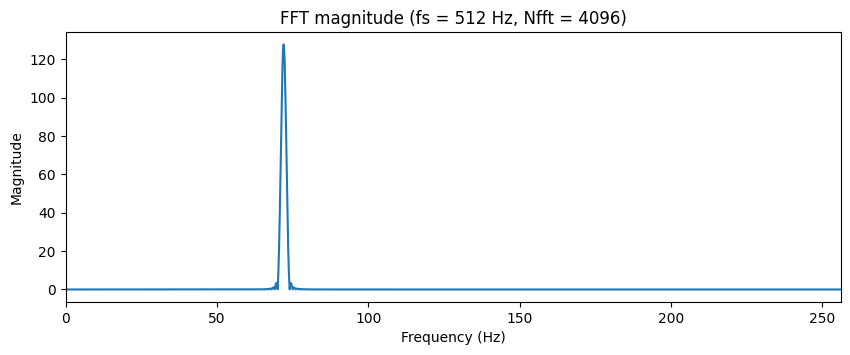

[low] fs = 512 Hz, Nyquist = 256.0 Hz, original frequency = 440 Hz, observed (aliased) ≈ 72.0 Hz
Saved audio: q10_low_fs512.wav



In [27]:
ResearchNyquistRate(high_fs,  "high")
ResearchNyquistRate(close_fs, "close")
ResearchNyquistRate(low_fs,   "low")